# TP1: Canny Edges

Read, understand, and complete the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). 

To execute a notebook, you will need to [install jupyter](http://jupyter.org/install.html). If you are using anaconda (strongly advised) you will have necessary libraries, if not, you may need to install them. If you cannot/don't want to use notebooks, you can return both your python code and a report in pdf. 

Return your work by e-mail using a single file (ipynb or zip) with the format 'introvis17_tp1_yourname.ipynb'

The first part is about basic image processing in Python, the second guides you in the implementation of the Canny edge detector.

## 1. Basic image processing in Python

Here are a set of useful libraries for image processing. You will need to refer to the online documentation of the different libraries to complete the TP.

In [1]:
import numpy as np 
# this is the key library for manipulating arrays. Use the online ressources! http://www.numpy.org/

import matplotlib.pyplot as plt 
# used to read images, display and plot http://matplotlib.org/api/pyplot_api.html . 
#You can also check this simple intro to using ipython notebook with images https://matplotlib.org/users/image_tutorial.html

%matplotlib inline 
# to display directly in the notebook

import scipy.ndimage as ndimage
# one of several python libraries for image procession

plt.rcParams['image.cmap'] = 'gray' 
# by default, the grayscale images are displayed with the jet colormap: use grayscale instead

Here is a simple example how to read and display an image.

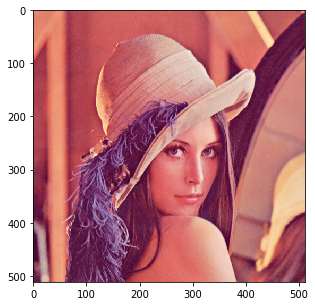

In [26]:
name='lena.jpg'
I=plt.imread(name)
plt.figure(figsize=(5,5)) # this line is not necessary, but allows you to control the size of the displayed image
plt.imshow(I)
plt.show() # this is necessary only if you want to display several images

a- What's the size of the image I? Its type? The type of the values it contains? What's its range? 

In [3]:
# complete this part. 
# Tip: look for numpy attributes (e.g. https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) 
# and functions to do what you want (e.g. np.min)
size = (I.shape[0], I.shape[1])
print("size of the image = " + str(size))
print("This is a rbg image")
print("I contains values of type " + str(I.dtype))
red_values = I[:,:,0]
green_values = I[:,:,1]
blue_values = I[:,:,2]
red_range = [np.min(red_values), np.max(red_values)]
green_range = [np.min(green_values), np.max(green_values)]
blue_range = [np.min(blue_values), np.max(blue_values)]
print("red values range = " + str(red_range))
print("green values range = " + str(green_range))
print("blue values range = " + str(blue_range))

size of the image = (512, 512)
This is a rbg image
I contains values of type uint8
red values range = [47, 255]
green values range = [0, 249]
blue values range = [11, 229]


b- Here is a simple function to load an image and crop it according to a bounding box. Make sure you understand every line

In [4]:
def load_image_v0(name,crop_window=-1): 
    I=plt.imread(name)
    if crop_window!=-1:
        I=I[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
    I=I.astype('float')/255 # just to scale the values of the image between 0 and 1 (instead of 0 255)
    return I

Use the function to display and save the 100x50 pixels of the bottom left corner of 'lena'. 

c- Modify the following function so that it can load an RGB image and convert it to a grayscale image (i.e. converting it from a WxHx3 array to a WxH array) using the formula L=0.2989 * R + 0.5870 * G + 0.1140 * B, where R, G and B are the three color channels of the color image and L is the luminance (i.e. the grayscale image). Include a test so that your function also works if the input image is grayscale.

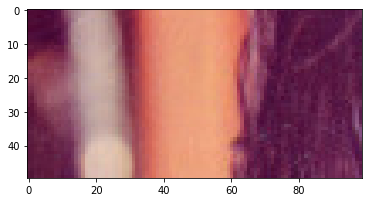

In [5]:
crop_window = [511-50, 511, 0, 99]
I = load_image_v0(name, crop_window)
plt.imshow(I)
plt.show()

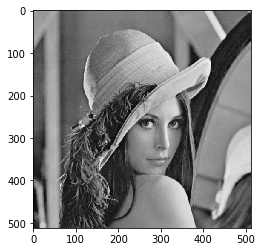

In [7]:
def load_image(name,crop_window=-1): 
    # Complete
    I=plt.imread(name)
    if crop_window!=-1:
        I=I[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
    I=I.astype('float')/255
    return 0.2989*I[:,:,0] + 0.5870*I[:,:,1] + 0.1140*I[:,:,2]
I=load_image(name)
plt.imshow(I)
plt.show()

Use your function to load a grayscale version of lena and save it as a png image.

For the rest of the TP, *use only grayscale images*

d- Here is an example of how to convolve an image with a Gaussian. What is the size of the output? What are the border conditions? Replace the border conditions with zero padding and comment on the result

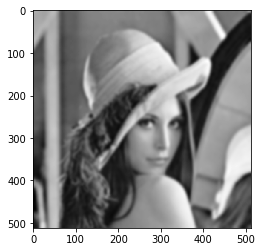

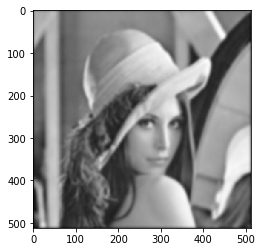

size of the output = (512, 512)
the border conditions are "reflect" by default, the image if reflected on each side
with a zero padding, we can see a black border


In [8]:
Ib1=ndimage.gaussian_filter(I, sigma=3)
Ib=ndimage.gaussian_filter(I, sigma=3, mode = 'constant')
plt.imshow(Ib1)
plt.show()
plt.imshow(Ib)
plt.show()
print("size of the output = " + str(Ib.shape))
print('the border conditions are "reflect" by default, the image if reflected on each side')
print("with a zero padding, we can see a black border")

e- What does the following code do? What's its visual effect on the image?

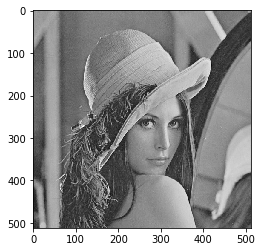

this code does a convolution between the kernel k and the image. It improves clearness of the image


In [10]:
k = np.array([[-1./9, -1./9, -1./9],
               [-1./9, 17./9, -1./9],
               [-1./9, -1./9, -1./9]])
O=ndimage.convolve(I, k)
plt.imshow(O)
plt.show()
print("this code does a convolution between the kernel k and the image. It improves clearness of the image")

f- Write a function "compute_gradient" that returns three images containing the input image derivative along the horizontal direction, the vertical direction, and the gradient norm. It should use forward differences, and take an optional argument "sigma" that gives the scale of the derivative (i.e. the standard deviation of the Gaussian kernel used to blur the image before taking the finite derivative). What is the size of the output compared to the size of the input?

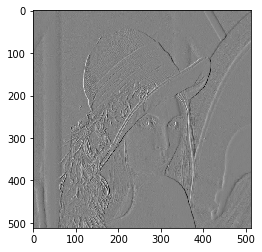

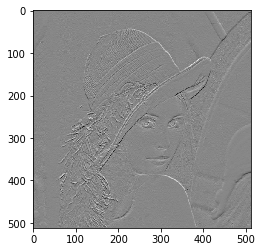

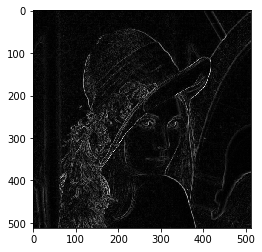

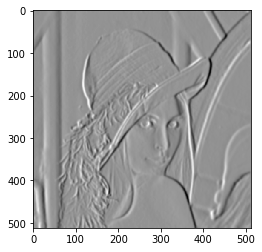

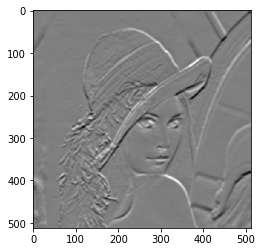

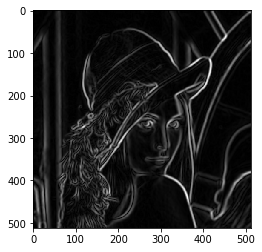

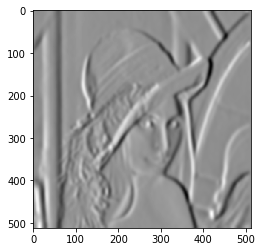

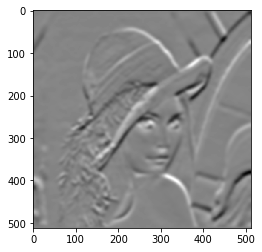

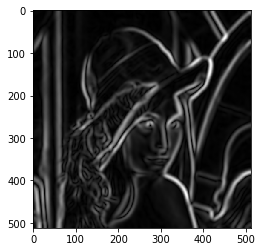

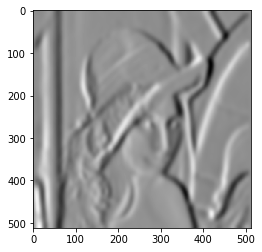

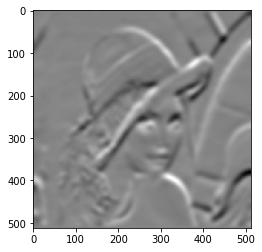

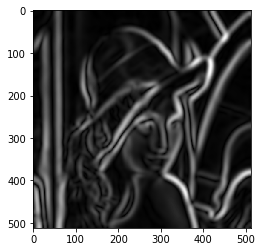

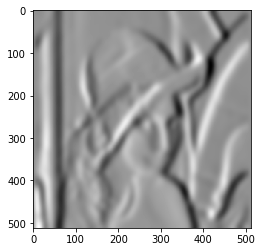

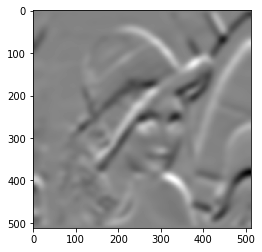

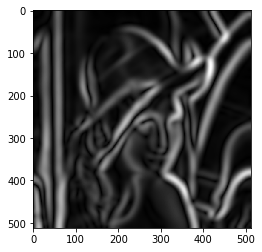

the output as the same shape as the input
clearness of gradients decreases as sigma increases, but some borders are thicker


In [11]:
def compute_gradient(I, sigma=0):
    k1 = np.array([[1, -1]])
    k2 = np.array([[1], [-1]])
    I = ndimage.gaussian_filter(I, sigma)
    O1 = ndimage.convolve(I,k1)
    O2 = ndimage.convolve(I,k2)
    return O1, O2, np.sqrt(np.power(O1,2) + np.power(O2, 2))



for sigma in range(0,10,2):
    O1, O2, O3 = compute_gradient(I,sigma)
    plt.imshow(O1)
    plt.show()
    plt.imshow(O2)
    plt.show()
    plt.imshow(O3)
    plt.show()

print("the output as the same shape as the input")
print("clearness of gradients decreases as sigma increases, but some borders are thicker")

g- Visualize the three images returned by your function for different values of sigma. Comment.


If you had difficulties to do this first part, it might be good to look at a few more examples before writting your own code. You can find many python tutorial for image processing online, for example http://www.scipy-lectures.org/advanced/image_processing/

## 2. Canny edges

a- Compute a binary image corresponding to thresholding the norm of the gradient. Discuss the parameters (there are two) and their influence of the results

b- Write a function "nms(gradient)" which takes as input the gradient and outputs a binary images with value 1 only for pixels that correspond to a maximum in the direction of the gradient.

c- Combine 'a' and 'b' to extract edges with a gradient norm larger than a given threshold.

d- Add the hysteresis thresholding to 'c' to implement a function computing the Canny edges.

Here is one way to do the hysteresis thresholding. Keep a list of the edges for which you have to visit neighboors. Initialize the list with the edges corresponding to the most discriminative threshold. For each edge you are sure of (i.e. in the list), you have to check if its neighboors are considered edges using the less discriminative threshold. If they are, add them to the output edges and in the list of edges to visit.

e- Use your algorithm with different parameters and comment on their effects.

Canny edges of the image


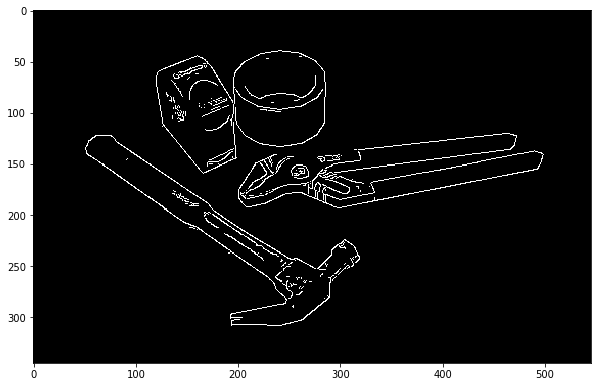

In [25]:
def threshold_gradient(I, sigma, threshold):
    G = compute_gradient(I, sigma)[2]
    B = np.zeros(G.shape)
    h, w = G.shape
    for i in range(w):
        for j in range(h):
            if G[i,j] > threshold:
                B[i,j] = 1
    return B

def normalize(gradient):
    max_gradient, min_gradient = np.max(gradient), np.min(gradient)
    gradient = (gradient - min_gradient) / (max_gradient - min_gradient)
    return gradient

# Useful function for nms
def orientation(angle):
        
    angle = 8 * angle / np.pi
    # east - west
    if -1 <= angle <= 1 or 7 <= angle or angle <= -7:
        return np.array([1, 0])
        
    # north-east - south-west
    if 1 <= angle <= 3 or -7 <= angle <= -5:
        return np.array([1, 1])
        
    # north - south
    if 3 <= angle <= 5 or -5 <= angle <= -3:
        return np.array([0, 1])
        
    # north-west - south-east
    if 5 <= angle <= 7 or -3 <= angle <= -1:
        return np.array([1, -1])

def nms(gradient, threshold):
    
    gradient_norm = normalize(np.sqrt(np.power(gradient[0],2) + np.power(gradient[1], 2)))
    gradient_norm *= (gradient_norm > threshold).astype('float')
    gradient_angle = np.arctan2(gradient[0], gradient[1])
    
    h, w = gradient[0].shape
    
    binary = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):
            pixel = gradient_norm[i,j]
            if pixel == 0:
                continue
            ori = orientation(gradient_angle[i,j])
            if i == 0 or j == 0 or i == h-1 or j == w-1:
                continue
            if pixel>=gradient_norm[tuple((i,j) + ori)] and  pixel>=gradient_norm[tuple((i,j) - ori)]:
                binary[i,j] = 1
    return binary

# Useful function for canny_edges
def unseen_neighbors(i0, j0, w, h, already_seen):
    indexes = [(i,j) for i in range(i0-1, i0+2) for j in range(j0-1, j0+2) if 0 <= i < h and 0 <= j < w 
               and (i,j) not in already_seen]
    return indexes

def canny_edges(I, sigma, low, high):
    gradient_hor, gradient_vert,gradient_norm = compute_gradient(I, sigma)
    gradient_norm = normalise(gradient_norm)
    gradient_nms = nms([gradient_hor, gradient_vert], low) * gradient_norm

    high_edges =  [(i, j) for (i, j), p in np.ndenumerate(gradient_nms) if p > high]
    already_seen = set(high_edges)
    h, w = gradient_norm.shape
    canny = gradient_nms * (gradient_nms > high)
    
    while high_edges:
        i,j = high_edges.pop()
        neighbors = unseen_neighbors(i, j, w, h, already_seen)
        for index in neighbors:
            if gradient_nms[index] > low:
                canny[index] = gradient_nms[index]
                high_edges.append(index)
        already_seen.update(neighbors)
            
    for i in range(h):
        for j in range(w):
            if canny[i,j] != 0:
                canny[i,j] = 1
                
    return canny
        

def show_canny(image, sigma, low, high):
    I = load_image(image)
    gradient = compute_gradient(I, sigma)[0:2]
    edges = canny_edges(I, sigma, low, high)
    plt.figure(figsize = (10., 10.))
    plt.imshow(edges)
    plt.show()
    
def show_nms(image, sigma, low):
    I = load_image(image)
    gradient = compute_gradient(I, sigma)[0:2]
    gradient_nms = nms(gradient, low)
    plt.figure(figsize = (10., 10.))
    plt.imshow(gradient_nms)
    plt.show()


sigma = 0.25
low = 0.1
high = 0.15

print("Canny edges of the image")
show_canny(name, sigma, low, high)